(100, 2) (2, 3)
(100, 3)


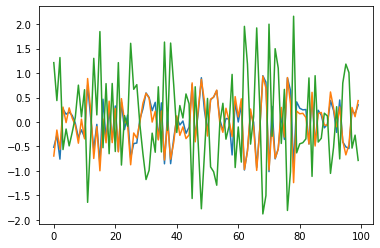

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

# data generation

nsample = 100
ndim = 3

W = np.random.multivariate_normal([0,0],[[1,0],[0,1]],nsample)  # mixture
H = np.array([[1,0],[1,0],[0,1]]).T #basis
print(W.shape,H.shape)
X = W@H+np.random.randn(nsample,ndim)*0.1
X= X-np.mean(X,axis=1).reshape(nsample,1)
print(X.shape)
plt.plot(X)
plt.show()


In [ ]:
class PCA():
    
    def __init__(self,K=1):
        self.K=K
        
    def transform(self, x):
        S = cov(x.T) #covariance matrix
        Hvalues, Hvectors = eig(S) # calculate the eigen vector and value
        #print(Hvalues, Hvalues.shape)
        #print(Hvectors, Hvectors.shape)
        idx = Hvalues.argsort()[::-1] # sort in descending order and take its index
        self.Hvalues = Hvalues[idx] 
        self.Hvectors = Hvectors[:, idx]
        self.Hvectors = Hvectors[:self.K, :][::-1] #taking K principle components
        #print(Hvectors, Hvectors.shape)
        w = x.dot(self.Hvectors.T) #reduced vactor
        return w
    
    def sse(self, x, w): # sum square error
        wh= w.dot(self.Hvectors)
        return np.sum((x-wh)**2)/np.sum((x)**2)
    
    def ContributionRatio(self):
      return np.round(self.Hvalues[:self.K]/np.sum(self.Hvalues), 3)

(100, 2)
[[ 0.42357222  1.40362634]
 [ 0.24893153  0.48029213]
 [ 0.6827665   1.46267549]
 [-0.22011541 -0.64711485]
 [-0.1585206  -0.13786078]
 [-0.1631501  -0.56839129]
 [-0.12176813 -0.2291012 ]
 [ 0.01859678  0.1157241 ]
 [ 0.26024483  0.87185237]
 [ 0.16826232  0.08599222]
 [ 0.26839998  0.75265786]
 [-0.63673961 -1.88519445]
 [-0.05902034 -0.38946187]
 [ 0.45506056  1.50550601]
 [ 0.0370895   0.17089691]
 [ 0.7158089   2.11957107]
 [-0.4535293  -0.5360033 ]
 [ 0.30093792  0.89961615]
 [-0.16869934 -0.76779117]
 [ 0.30792924  0.90158631]
 [-0.28904704 -0.67808912]
 [ 0.51873605  1.37796672]
 [-0.34060347 -1.01089469]
 [ 0.15762382  0.11945363]
 [-0.14673341 -0.06944578]
 [ 0.61536831  1.84624718]
 [ 0.40905327  0.72439524]
 [ 0.38530159  0.8506467 ]
 [-0.05712675 -0.04994202]
 [-0.21850742 -0.75962045]
 [-0.51335563 -1.33469402]
 [-0.43539774 -1.11810556]
 [-0.22933313 -0.22376631]
 [-0.37013011 -0.67456336]
 [ 0.30169187  0.81812007]
 [-0.35893307 -0.66986396]
 [ 0.74961739  1.84

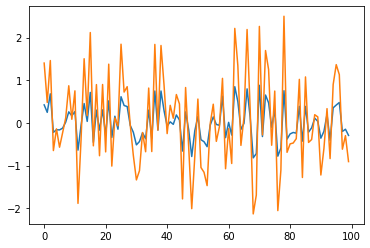

In [ ]:
pca=PCA(K=2)
result=pca.transform(X) # apply PCA 
print(result.shape)
print(result) # show first k principle 
print(pca.ContributionRatio()) # contribution ratio
print(pca.sse(X, result)) # check error
plt.plot(result) # check plot
plt.show()

番外編　**Kの違いによる比較**

(100, 1)
0.1452264964830762


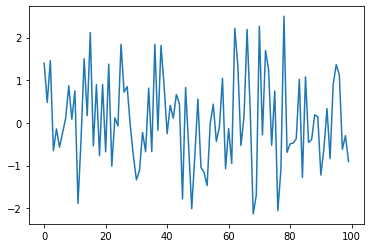

In [ ]:
#K=1
pca=PCA()
result=pca.transform(X)
print(result.shape)
print(pca.sse(X, result))
plt.plot(result)
plt.show()

(100, 2)
0.021713923843472684


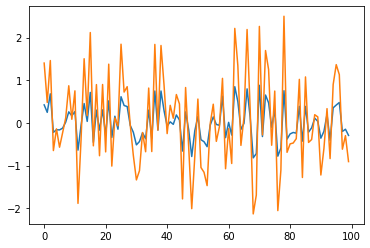

In [ ]:
#K=2
pca=PCA(K=2)
result=pca.transform(X)
print(result.shape)
print(pca.sse(X, result))
plt.plot(result)
plt.show()

(100, 3)
2.9212642458313927e-29


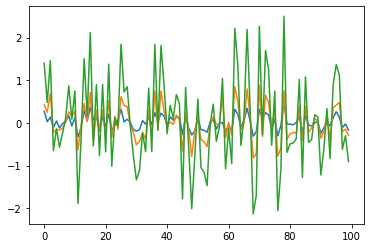

In [ ]:
#K=3
pca=PCA(K=3)
result=pca.transform(X)
print(result.shape)
print(pca.sse(X, result))
plt.plot(result)
plt.show()